In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

!gcloud projects list

from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client(project='clinical-entity-extraction')

# List all tables in the dataset.
dataset_ref = client.get_dataset('physionet-data.mimiciii_clinical')
tables = list(client.list_tables(dataset_ref))

print("Tables:")
for table in tables:
    table_ref = dataset_ref.table(table.table_id)
    table = client.get_table(table_ref)
    print(f"  {table.table_id}: {table.num_rows} rows")

Authenticated
PROJECT_ID                  NAME                        PROJECT_NUMBER
clinical-entity-extraction  clinical-entity-extraction  321960627270
dulcet-elevator-257302      Personal API project        731274068268
hackhelper-cb7fe            HackOrganized               284511353607
physionet-data-449900       physionet-data              398801384102
ricehack-ac1a8              riceHack                    1054752105505
safesound-e5d17             safesound                   14104572424
stayalert-8b5b2             StayAlert                   721751451925
Tables:
  admissions: 58976 rows
  callout: 34499 rows
  caregivers: 7567 rows
  chartevents: 330712483 rows
  cptevents: 573146 rows
  d_cpt: 134 rows
  d_icd_diagnoses: 14567 rows
  d_icd_procedures: 3882 rows
  d_items: 12487 rows
  d_labitems: 753 rows
  datetimeevents: 4485937 rows
  diagnoses_icd: 651047 rows
  drgcodes: 125557 rows
  icustays: 61532 rows
  inputevents_cv: 17527935 rows
  inputevents_mv: 3618991 rows
  lab

In [7]:
from google.colab import auth
auth.authenticate_user()
client = bigquery.Client(project='clinical-entity-extraction')

# Define the query
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.admissions`
"""

# Run the query
query_job = client.query(query)

# Print the results
admissions = query_job.to_dataframe()
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ROW_ID                58976 non-null  Int64         
 1   SUBJECT_ID            58976 non-null  Int64         
 2   HADM_ID               58976 non-null  Int64         
 3   ADMITTIME             58976 non-null  datetime64[us]
 4   DISCHTIME             58976 non-null  datetime64[us]
 5   DEATHTIME             5854 non-null   datetime64[us]
 6   ADMISSION_TYPE        58976 non-null  object        
 7   ADMISSION_LOCATION    58976 non-null  object        
 8   DISCHARGE_LOCATION    58976 non-null  object        
 9   INSURANCE             58976 non-null  object        
 10  LANGUAGE              33644 non-null  object        
 11  RELIGION              58518 non-null  object        
 12  MARITAL_STATUS        48848 non-null  object        
 13  ETHNICITY       

In [6]:
# Define the query
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.patients`
"""

# Run the query
query_job = client.query(query)

# Print the results
patients = query_job.to_dataframe()
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ROW_ID       46520 non-null  Int64         
 1   SUBJECT_ID   46520 non-null  Int64         
 2   GENDER       46520 non-null  object        
 3   DOB          46520 non-null  datetime64[us]
 4   DOD          15759 non-null  datetime64[us]
 5   DOD_HOSP     9974 non-null   datetime64[us]
 6   DOD_SSN      13378 non-null  datetime64[us]
 7   EXPIRE_FLAG  46520 non-null  Int64         
dtypes: Int64(3), datetime64[us](4), object(1)
memory usage: 3.0+ MB


In [36]:
from datetime import datetime

def calculate_age(birth_date, death_date):

    #birth_date = datetime.strptime(birth_date, '%Y-%m-%d %H:%M:%S')
    if(death_date == None):
      death_date = datetime.now() + datetime.timedelta(years=5000)
    #else:
      #death_date = datetime.strptime(death_date, '%Y-%m-%d %H:%M:%S')
    age = (death_date - birth_date).days // 365

    return age

patients["age"] = patients.apply(lambda x: calculate_age(x["DOB"], x["DOD"]), axis=1)
filtered_df = patients[patients["age"] < 120]

print(filtered_df.head)


<bound method NDFrame.head of        ROW_ID  SUBJECT_ID GENDER        DOB        DOD   DOD_HOSP    DOD_SSN  \
1       17808       18848      F 2042-08-21 2128-01-08 2128-01-08 2128-01-08   
2       36390       61056      F 2067-04-11 2152-01-08 2152-01-08 2152-01-08   
3       25371       26889      F 2115-11-04 2164-01-08 2164-01-08 2164-01-08   
4       17328       18333      F 2094-01-21 2168-01-08 2168-01-08 2168-01-08   
5        7313        7730      F 2166-03-28 2196-01-08 2196-01-08 2196-01-08   
...       ...         ...    ...        ...        ...        ...        ...   
15753   29044       30902      M 2072-11-15 2155-10-23 2155-10-23        NaT   
15754   43900       89992      M 2110-07-07 2195-11-07 2195-11-07        NaT   
15756   28057       29824      M 2074-10-23 2155-12-07 2155-12-07        NaT   
15757   25239       26744      M 2137-09-24 2199-12-15 2199-12-15        NaT   
15758    7108        7509      M 2046-03-13 2103-12-23 2103-12-23        NaT   

       EX

In [37]:
filtered_df["EXPIRE_FLAG"].value_counts()

,count
EXPIRE_FLAG,
1,14279


In [39]:
filtered_df["age"].value_counts()

,count
age,
83.0,503
84.0,484
81.0,484
79.0,475
86.0,472
...,...
18.0,3
1.0,1
98.0,1


In [42]:
filtered_df["age"].describe()

,age
count,14279.000000
mean,69.827719
std,15.120301
min,0.000000
25%,61.000000
50%,73.000000
75%,82.000000
max,98.000000


In [41]:
filtered_df["GENDER"].value_counts()


,count
GENDER,
M,7982
F,6297


In [45]:
filtered_df["age"].loc[patients['GENDER'] == 'F' ].describe()

,age
count,6297.000000
mean,71.115928
std,15.022608
min,0.000000
25%,63.000000
50%,75.000000
75%,83.000000
max,98.000000


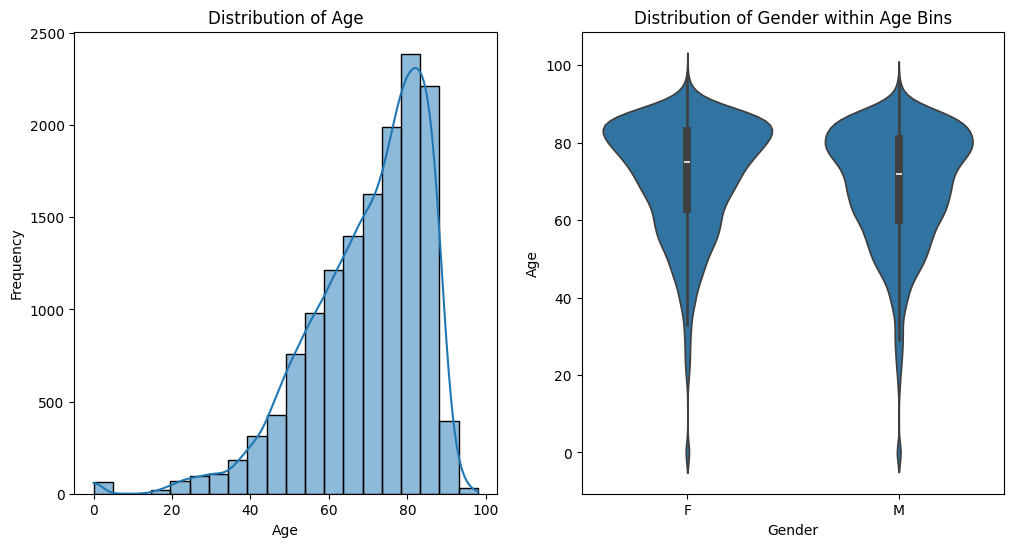

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(data=filtered_df , x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.violinplot(data=filtered_df, x='GENDER', y='age', inner='box')
plt.title('Distribution of Gender within Age Bins')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.show()

In [53]:
admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,3757,3115,134067,2139-02-13 03:11:00,2139-02-20 07:33:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2139-02-13 00:02:00,2139-02-13 03:22:00,STAB WOUND,0,1
1,8689,7124,109129,2188-07-11 00:58:00,2188-08-01 12:04:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2188-07-10 14:17:00,2188-07-11 01:52:00,PENILE LACERATION-CELLULITIS,0,1
2,12652,10348,121510,2133-04-16 21:12:00,2133-04-23 15:52:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,UNKNOWN/NOT SPECIFIED,2133-04-16 19:22:00,2133-04-16 22:17:00,STATUS EPILEPTICUS,0,1
3,11501,9396,106469,2109-02-16 23:14:00,2109-02-23 12:01:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2109-02-16 20:58:00,2109-02-16 23:42:00,SUBDURAL HEMATOMA,0,1
4,11419,9333,133732,2167-10-06 18:35:00,2167-10-16 13:13:00,NaT,URGENT,TRANSFER FROM HOSP/EXTRAM,SNF,Private,None,None,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,CORONARY ARTERY DISEASE,0,1


In [54]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ROW_ID                58976 non-null  Int64         
 1   SUBJECT_ID            58976 non-null  Int64         
 2   HADM_ID               58976 non-null  Int64         
 3   ADMITTIME             58976 non-null  datetime64[us]
 4   DISCHTIME             58976 non-null  datetime64[us]
 5   DEATHTIME             5854 non-null   datetime64[us]
 6   ADMISSION_TYPE        58976 non-null  object        
 7   ADMISSION_LOCATION    58976 non-null  object        
 8   DISCHARGE_LOCATION    58976 non-null  object        
 9   INSURANCE             58976 non-null  object        
 10  LANGUAGE              33644 non-null  object        
 11  RELIGION              58518 non-null  object        
 12  MARITAL_STATUS        48848 non-null  object        
 13  ETHNICITY       

In [56]:
import pandas as pd
merge_data = pd.merge(admissions, filtered_df, on='SUBJECT_ID')
merge_data.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,age
0,8689,7124,109129,2188-07-11 00:58:00,2188-08-01 12:04:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,0,1,6738,M,2135-11-25,2188-08-02,NaT,2188-08-02,1,52.0
1,12652,10348,121510,2133-04-16 21:12:00,2133-04-23 15:52:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,0,1,9793,F,2049-06-08,2133-06-19,NaT,2133-06-19,1,84.0
2,25262,20691,119601,2198-02-09 14:58:00,2198-02-20 15:33:00,NaT,URGENT,TRANSFER FROM HOSP/EXTRAM,SNF,Private,...,0,1,19525,F,2131-10-14,2202-01-16,NaT,2202-01-16,1,70.0
3,1654,1340,169611,2193-12-17 11:08:00,2193-12-19 13:12:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,...,0,1,1274,F,2115-10-16,2198-09-03,NaT,2198-09-03,1,82.0
4,16917,13809,188102,2181-10-27 02:52:00,2181-10-29 14:07:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,...,0,1,13057,M,2135-11-20,2183-05-05,NaT,2183-05-05,1,47.0


In [57]:
merge_data['ADMISSION_TYPE'].value_counts()

,count
ADMISSION_TYPE,
EMERGENCY,17755
ELECTIVE,2123
URGENT,655
NEWBORN,65


In [58]:
merge_data['ADMISSION_LOCATION'].value_counts()

,count
ADMISSION_LOCATION,
EMERGENCY ROOM ADMIT,10694
TRANSFER FROM HOSP/EXTRAM,3720
CLINIC REFERRAL/PREMATURE,3081
PHYS REFERRAL/NORMAL DELI,2885
TRANSFER FROM SKILLED NUR,166
TRANSFER FROM OTHER HEALT,43
** INFO NOT AVAILABLE **,5
HMO REFERRAL/SICK,4


In [59]:
merge_data['INSURANCE'].value_counts()

,count
INSURANCE,
Medicare,14113
Private,4567
Medicaid,1502
Government,290
Self Pay,126


In [60]:
merge_data['DISCHARGE_LOCATION'].value_counts()

,count
DISCHARGE_LOCATION,
DEAD/EXPIRED,5305
HOME HEALTH CARE,3841
SNF,3383
REHAB/DISTINCT PART HOSP,2995
HOME,2887
LONG TERM CARE HOSPITAL,967
DISC-TRAN CANCER/CHLDRN H,362
HOSPICE-HOME,308
SHORT TERM HOSPITAL,220


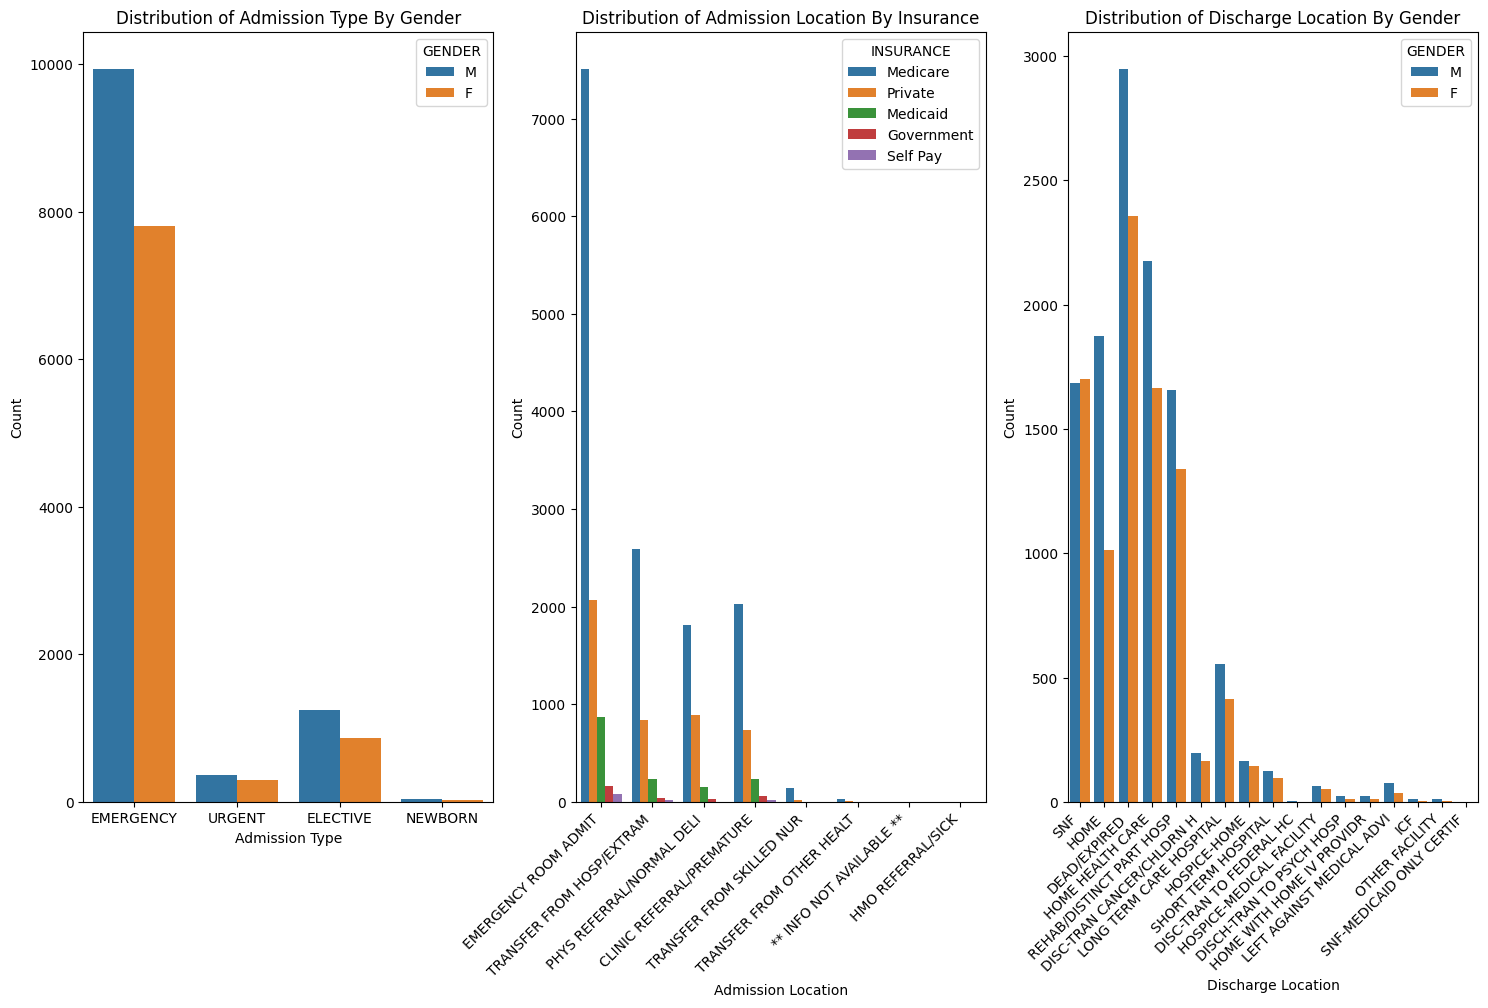

In [61]:
plt.figure(figsize=(18,10))
plt.subplot(1, 3, 1)
sns.countplot(data=merge_data , x='ADMISSION_TYPE',hue='GENDER')
plt.title('Distribution of Admission Type By Gender')
plt.xlabel('Admission Type')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.countplot(data=merge_data, x='ADMISSION_LOCATION',hue='INSURANCE')
plt.title('Distribution of Admission Location By Insurance')
plt.xlabel('Admission Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.countplot(data=merge_data, x='DISCHARGE_LOCATION',hue='GENDER')
plt.title('Distribution of Discharge Location By Gender')
plt.xlabel('Discharge Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.show()


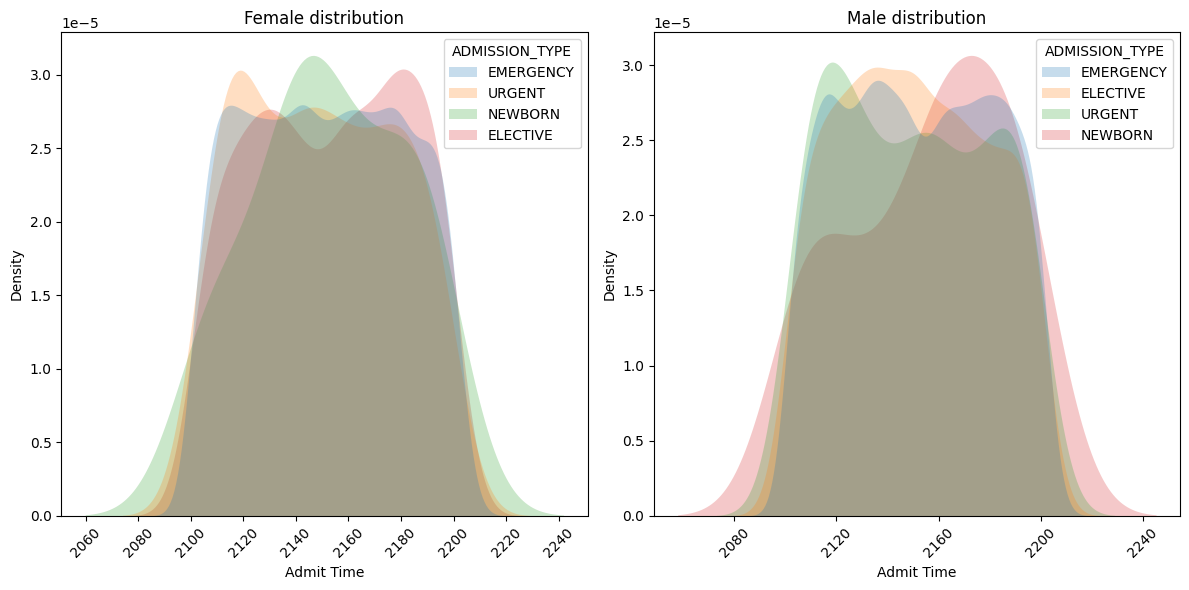

In [66]:
male_data = merge_data[merge_data['GENDER'] == 'M']
female_data = merge_data[merge_data['GENDER'] == 'F']

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=female_data, x='ADMITTIME', hue='ADMISSION_TYPE', label='Female', fill=True, common_norm=False, palette='tab10', linewidth=0)
plt.xlabel('Admit Time')
plt.ylabel('Density')
plt.title('Female distribution')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
sns.kdeplot(data=male_data, x='ADMITTIME', hue='ADMISSION_TYPE', label='Male', fill=True, common_norm=False, palette='tab10', linewidth=0)
plt.xlabel('Admit Time')
plt.ylabel('Density')
plt.title('Male distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


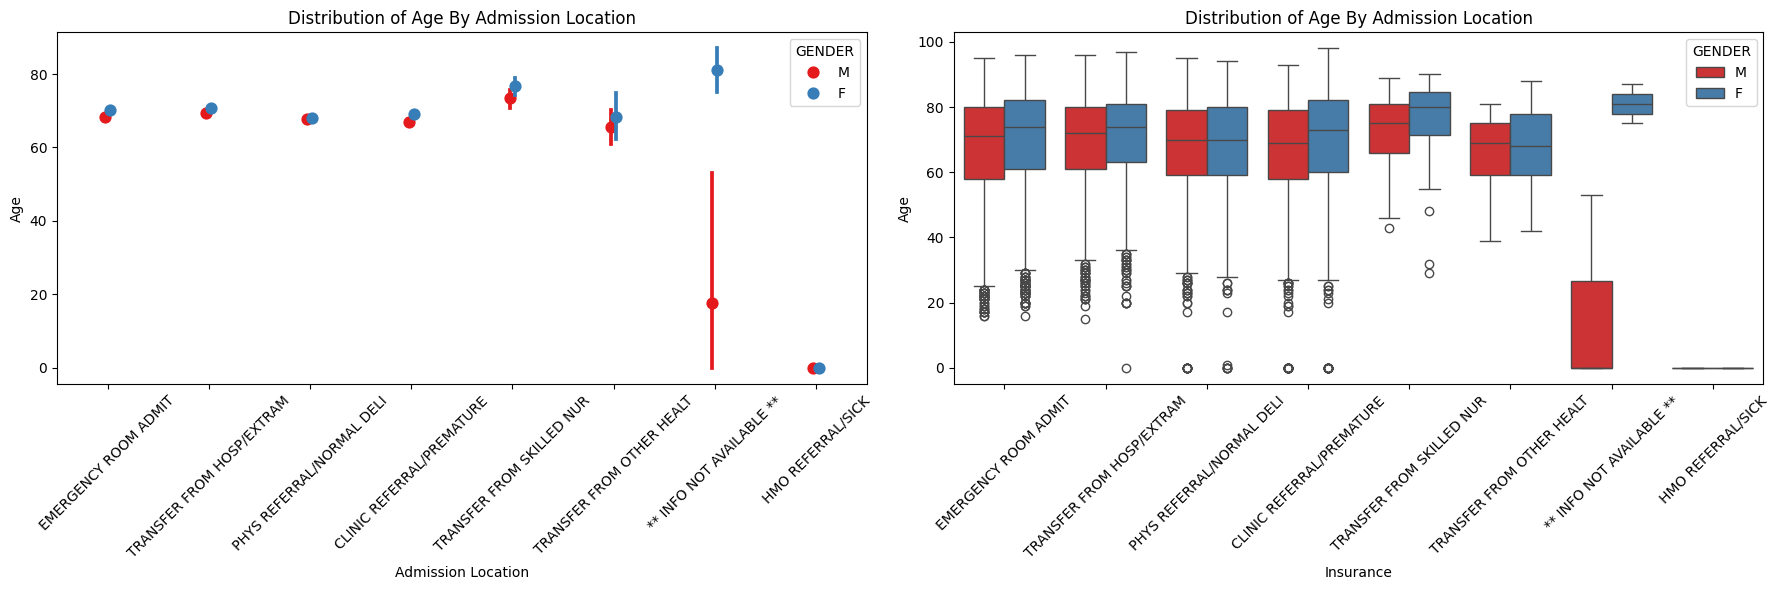

In [72]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
sns.pointplot(data = merge_data, x= 'ADMISSION_LOCATION', y='age', hue='GENDER', palette='Set1', dodge=True, linestyles="")
plt.title('Distribution of Age By Admission Location')
plt.xlabel('Admission Location')
plt.ylabel('Age')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
sns.boxplot(data = merge_data,  x= 'ADMISSION_LOCATION', y='age', hue='GENDER', palette='Set1')
plt.title('Distribution of Age By Admission Location')
plt.xlabel('Insurance')
plt.ylabel('Age')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [81]:
# Define the query
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.d_icd_diagnoses`
"""

# Run the query
query_job = client.query(query)

# Print the results
d_icd_diagnoses = query_job.to_dataframe()
d_icd_diagnoses.info()
print(d_icd_diagnoses.head)

query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.d_icd_procedures`
"""

# Run the query
query_job = client.query(query)
print('--------------------------------------------------')
# Print the results
d_icd_procedures = query_job.to_dataframe()
d_icd_procedures.info()
print(d_icd_procedures.head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14567 entries, 0 to 14566
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ROW_ID       14567 non-null  Int64 
 1   ICD9_CODE    14567 non-null  object
 2   SHORT_TITLE  14567 non-null  object
 3   LONG_TITLE   14567 non-null  object
dtypes: Int64(1), object(3)
memory usage: 469.6+ KB
<bound method NDFrame.head of        ROW_ID ICD9_CODE               SHORT_TITLE  \
0        5060       436                       Cva   
1        8959     78001                      Coma   
2       13491     E0062                      Golf   
3         530      0460                      Kuru   
4        2965     30752                      Pica   
...       ...       ...                       ...   
14562   13901     E8333  Wtrcraft stair fall-psgr   
14563   10047     E8388  Wtrcrft acc NEC-pers NEC   
14564   10048     E8389  Wtrcrft acc NEC-pers NOS   
14565   11683     E9263  X-ray/gam

In [82]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20598 entries, 0 to 20597
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ROW_ID_x              20598 non-null  Int64         
 1   SUBJECT_ID            20598 non-null  Int64         
 2   HADM_ID               20598 non-null  Int64         
 3   ADMITTIME             20598 non-null  datetime64[us]
 4   DISCHTIME             20598 non-null  datetime64[us]
 5   DEATHTIME             5305 non-null   datetime64[us]
 6   ADMISSION_TYPE        20598 non-null  object        
 7   ADMISSION_LOCATION    20598 non-null  object        
 8   DISCHARGE_LOCATION    20598 non-null  object        
 9   INSURANCE             20598 non-null  object        
 10  LANGUAGE              10919 non-null  object        
 11  RELIGION              20381 non-null  object        
 12  MARITAL_STATUS        19416 non-null  object        
 13  ETHNICITY       

In [85]:
icd9_dict = d_icd_diagnoses.set_index('ICD9_CODE')['SHORT_TITLE'].to_dict()


In [88]:
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.diagnoses_icd`
"""

# Run the query
query_job = client.query(query)
# Print the results
diagnoses_icd = query_job.to_dataframe()
diagnoses_icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ROW_ID      651047 non-null  Int64 
 1   SUBJECT_ID  651047 non-null  Int64 
 2   HADM_ID     651047 non-null  Int64 
 3   SEQ_NUM     651000 non-null  Int64 
 4   ICD9_CODE   651000 non-null  object
dtypes: Int64(4), object(1)
memory usage: 27.3+ MB


<ipython-input-112-0d0f08745e0b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diagnosis_codes_for_married.values, y=top_diagnosis_codes_for_married.index, palette='viridis')
<ipython-input-112-0d0f08745e0b>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diagnosis_codes_for_single.values, y=top_diagnosis_codes_for_single.index, palette='viridis')
<ipython-input-112-0d0f08745e0b>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diagnosis_codes_for_divorced.values, y=top_diagnosis_codes_for_divorced.index, palette='vi

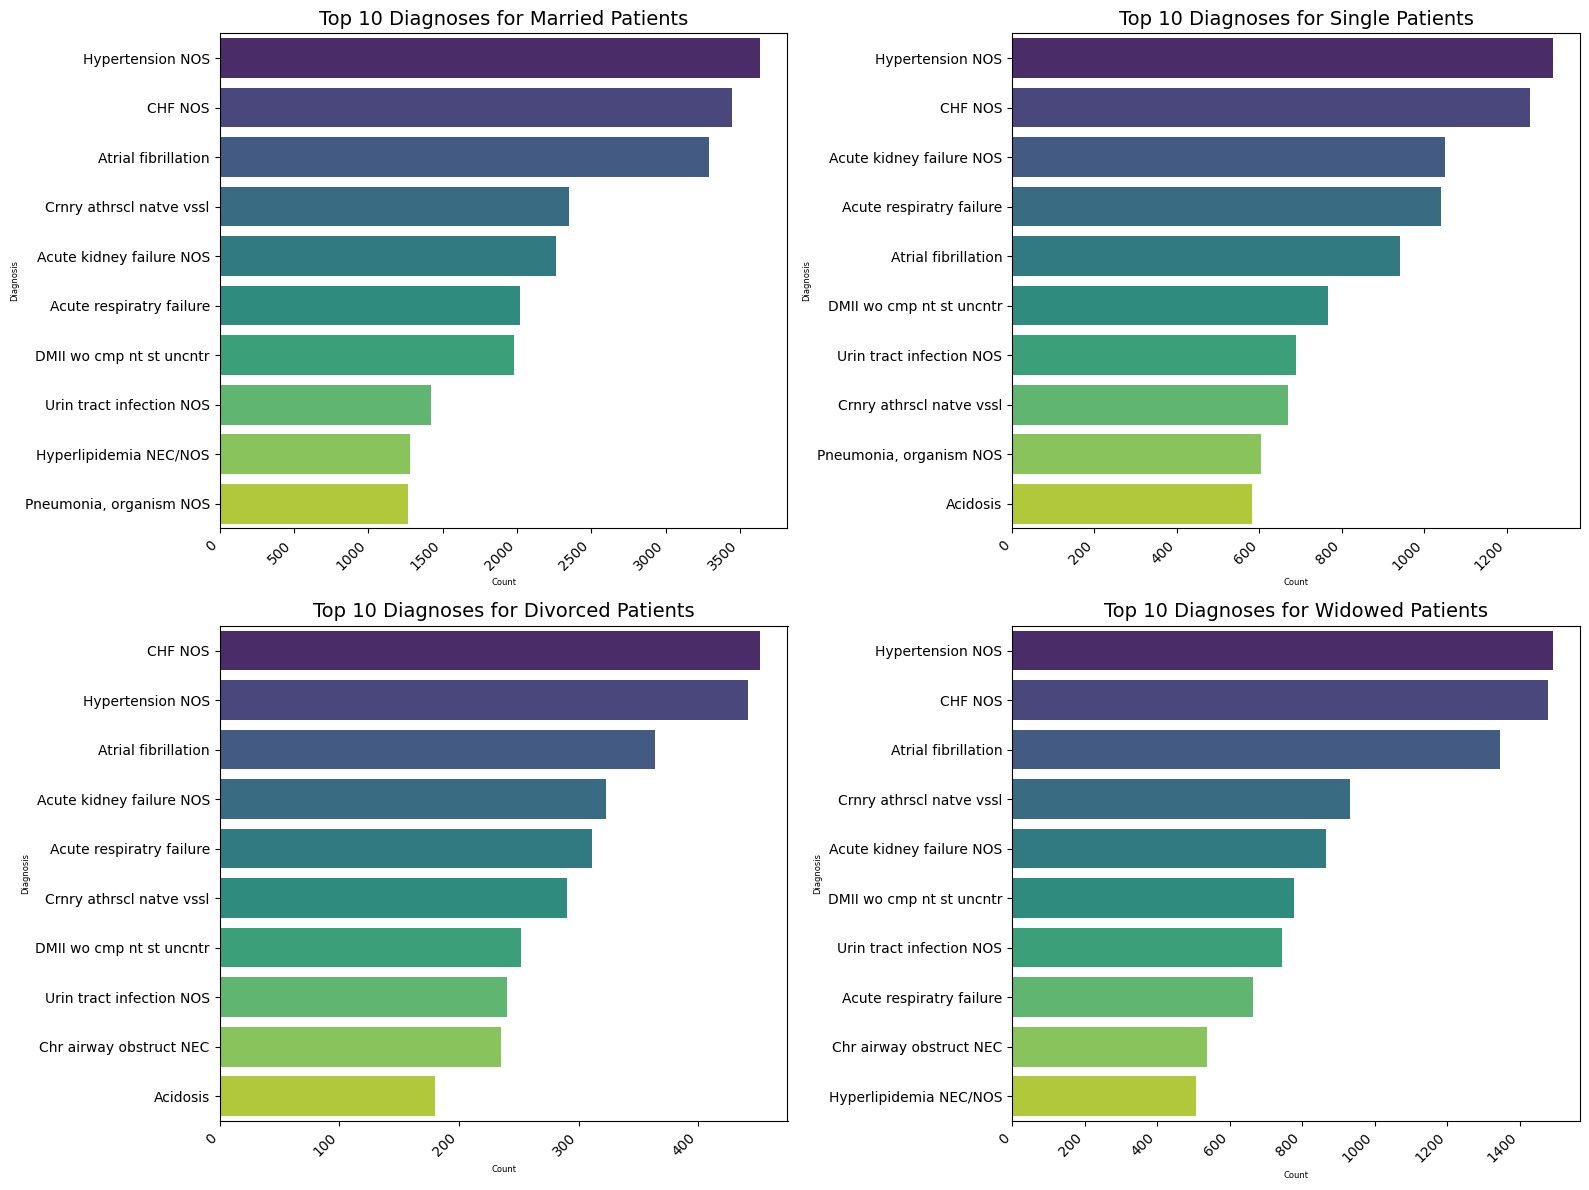

<ipython-input-112-0d0f08745e0b>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diagnosis_codes.values, y=top_diagnosis_codes.index, palette='viridis')


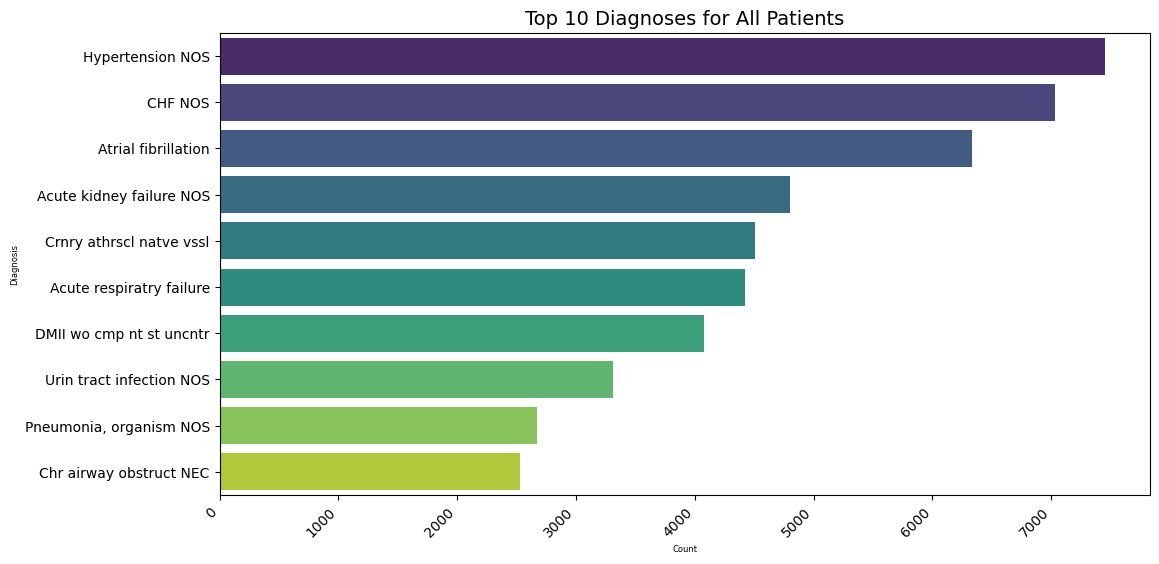

In [112]:
import pandas as pd

merge_data_diagnosis = pd.merge(merge_data, diagnoses_icd, how='inner')
#merge_data_diagnosis.info()
top_diagnosis_codes = merge_data_diagnosis['ICD9_CODE'].value_counts().head(10)
top_diagnosis_codes_for_married = merge_data_diagnosis[merge_data_diagnosis['MARITAL_STATUS'] == 'MARRIED']['ICD9_CODE'].value_counts().head(10)
top_diagnosis_codes_for_single = merge_data_diagnosis[merge_data_diagnosis['MARITAL_STATUS'] == 'SINGLE']['ICD9_CODE'].value_counts().head(10)
top_diagnosis_codes_for_divorced = merge_data_diagnosis[merge_data_diagnosis['MARITAL_STATUS'] == 'DIVORCED']['ICD9_CODE'].value_counts().head(10)
top_diagnosis_codes_for_widowed = merge_data_diagnosis[merge_data_diagnosis['MARITAL_STATUS'] == 'WIDOWED']['ICD9_CODE'].value_counts().head(10)

married_short_titles = [icd9_dict[code] for code in top_diagnosis_codes_for_married.index]
single_short_titles = [icd9_dict[code] for code in top_diagnosis_codes_for_single.index]
divorced_short_titles = [icd9_dict[code] for code in top_diagnosis_codes_for_divorced.index]
widowed_short_titles = [icd9_dict[code] for code in top_diagnosis_codes_for_widowed.index]
short_titles = [icd9_dict[code] for code in top_diagnosis_codes.index]


plt.figure(figsize=(16, 12))
# Married Patients
plt.subplot(2, 2, 1)
plt.yticks(range(10), married_short_titles)
sns.barplot(x=top_diagnosis_codes_for_married.values, y=top_diagnosis_codes_for_married.index, palette='viridis')
plt.title('Top 10 Diagnoses for Married Patients', fontsize=14)
plt.xlabel('Count', fontsize=6)
plt.ylabel('Diagnosis', fontsize=6)
plt.xticks(rotation=45, ha='right')

# Single Patients
plt.subplot(2, 2, 2)
plt.yticks(range(10), single_short_titles)
sns.barplot(x=top_diagnosis_codes_for_single.values, y=top_diagnosis_codes_for_single.index, palette='viridis')
plt.title('Top 10 Diagnoses for Single Patients', fontsize=14)
plt.xlabel('Count', fontsize=6)
plt.ylabel('Diagnosis', fontsize=6)
plt.xticks(rotation=45, ha='right')


# Divorced Patients
plt.subplot(2, 2, 3)
plt.yticks(range(10), divorced_short_titles)
sns.barplot(x=top_diagnosis_codes_for_divorced.values, y=top_diagnosis_codes_for_divorced.index, palette='viridis')
plt.title('Top 10 Diagnoses for Divorced Patients', fontsize=14)
plt.xlabel('Count', fontsize=6)
plt.ylabel('Diagnosis', fontsize=6)
plt.xticks(rotation=45, ha='right')


# Widowed Patients
plt.subplot(2, 2, 4)
plt.yticks(range(10), widowed_short_titles)
sns.barplot(x=top_diagnosis_codes_for_widowed.values, y=top_diagnosis_codes_for_widowed.index, palette='viridis')
plt.title('Top 10 Diagnoses for Widowed Patients', fontsize=14)
plt.xlabel('Count', fontsize=6)
plt.ylabel('Diagnosis', fontsize=6)
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.yticks(range(10), short_titles)
sns.barplot(x=top_diagnosis_codes.values, y=top_diagnosis_codes.index, palette='viridis')
plt.title('Top 10 Diagnoses for All Patients', fontsize=14)
plt.xlabel('Count', fontsize=6)
plt.ylabel('Diagnosis', fontsize=6)
plt.xticks(rotation=45, ha='right')
plt.show()



In [113]:
merge_data_diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268176 entries, 0 to 268175
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ROW_ID_x              268176 non-null  Int64         
 1   SUBJECT_ID            268176 non-null  Int64         
 2   HADM_ID               268176 non-null  Int64         
 3   ADMITTIME             268176 non-null  datetime64[us]
 4   DISCHTIME             268176 non-null  datetime64[us]
 5   DEATHTIME             74838 non-null   datetime64[us]
 6   ADMISSION_TYPE        268176 non-null  object        
 7   ADMISSION_LOCATION    268176 non-null  object        
 8   DISCHARGE_LOCATION    268176 non-null  object        
 9   INSURANCE             268176 non-null  object        
 10  LANGUAGE              169937 non-null  object        
 11  RELIGION              266569 non-null  object        
 12  MARITAL_STATUS        255522 non-null  object        
 13 

<ipython-input-116-7dc532da95ae>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mortality_by_age = merge_data_diagnosis.groupby("AgeGroup")["HOSPITAL_EXPIRE_FLAG"].mean() * 100  # Convert to percentage


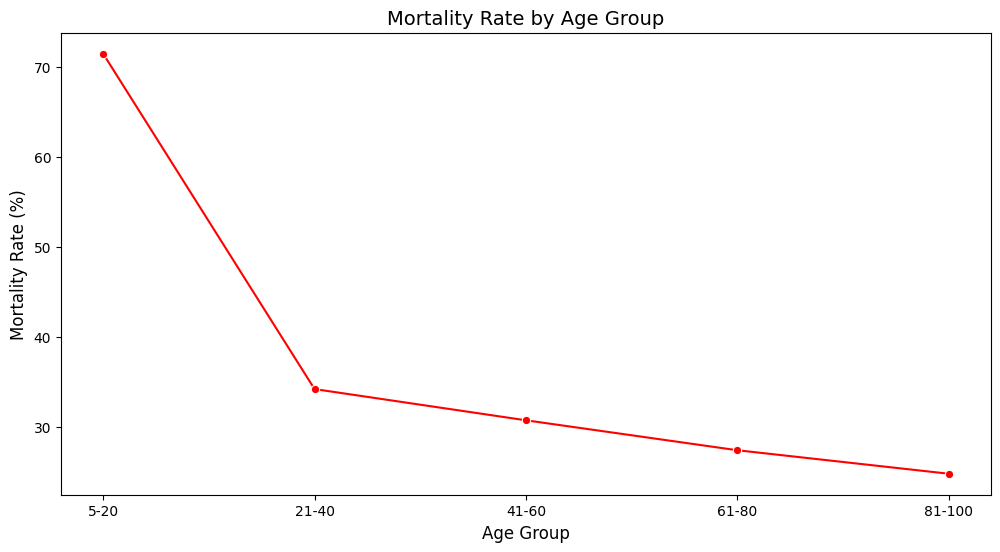

In [116]:
plt.figure(figsize=(12, 6))
age_bins = [0, 20, 40, 60, 80, 100]
merge_data_diagnosis["AgeGroup"] = pd.cut(merge_data_diagnosis["age"], bins=age_bins, labels=["0-20", "21-40", "41-60", "61-80", "81-100"])
mortality_by_age = merge_data_diagnosis.groupby("AgeGroup")["HOSPITAL_EXPIRE_FLAG"].mean() * 100  # Convert to percentage

sns.lineplot(x=mortality_by_age.index, y=mortality_by_age.values, marker="o", color="r")
plt.title("Mortality Rate by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Mortality Rate (%)", fontsize=12)
plt.show()

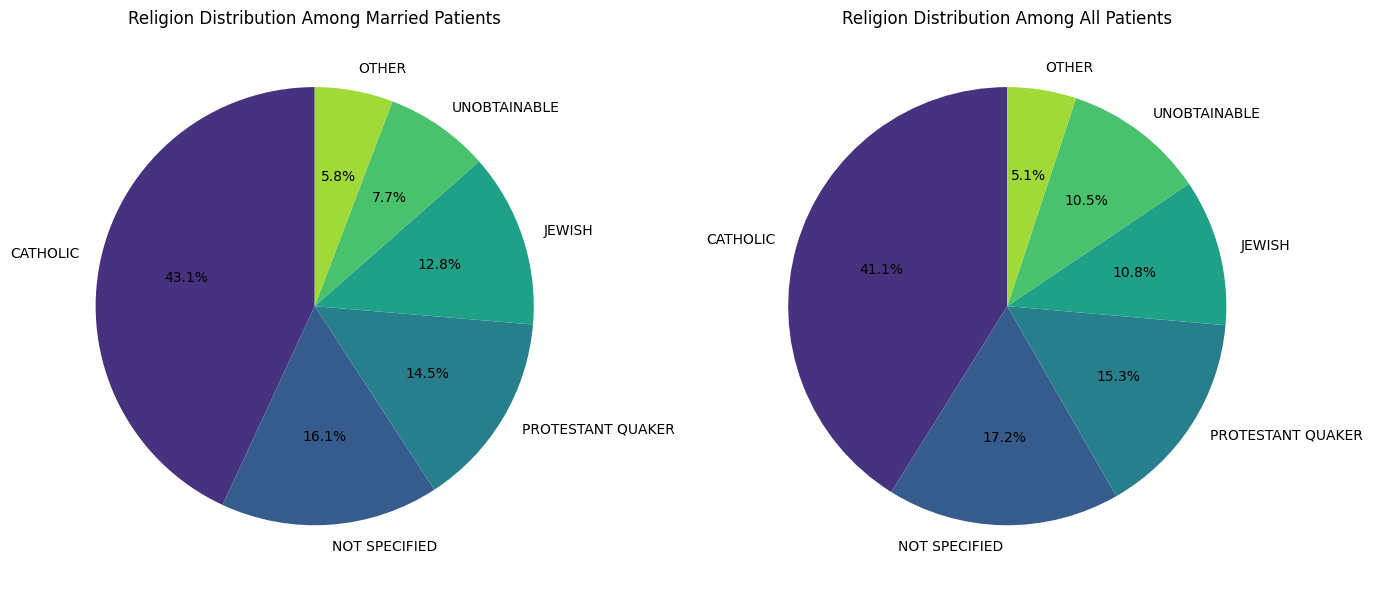

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for married patients
married_data = merge_data_diagnosis[merge_data_diagnosis["MARITAL_STATUS"] == "MARRIED"]

# Count occurrences of each religion for married patients
married_religion_counts = married_data["RELIGION"].value_counts()

# Count occurrences of each religion for all patients
all_religion_counts = merge_data_diagnosis["RELIGION"].value_counts()

# Function to group smaller religions into "OTHER"
def group_small_categories(counts, threshold=0.05):
    total = counts.sum()
    filtered_counts = counts[counts / total > threshold]
    other_count = total - filtered_counts.sum()
    if other_count > 0:
        filtered_counts["OTHER"] = other_count
    return filtered_counts

# Apply the function to group small categories
married_religion_counts = group_small_categories(married_religion_counts, threshold=0.03)
all_religion_counts = group_small_categories(all_religion_counts, threshold=0.03)

# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for religion distribution among married patients
axes[0].pie(married_religion_counts, labels=married_religion_counts.index, autopct="%1.1f%%", startangle=90,
            colors=sns.color_palette("viridis", len(married_religion_counts)))
axes[0].set_title("Religion Distribution Among Married Patients")

# Pie chart for religion distribution among all patients
axes[1].pie(all_religion_counts, labels=all_religion_counts.index, autopct="%1.1f%%", startangle=90,
            colors=sns.color_palette("viridis", len(all_religion_counts)))
axes[1].set_title("Religion Distribution Among All Patients")

# Show plot
plt.tight_layout()
plt.show()


In [119]:
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.icustays`
"""

# Run the query
query_job = client.query(query)
# Print the results
icustays = query_job.to_dataframe()
icustays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ROW_ID          61532 non-null  Int64         
 1   SUBJECT_ID      61532 non-null  Int64         
 2   HADM_ID         61532 non-null  Int64         
 3   ICUSTAY_ID      61532 non-null  Int64         
 4   DBSOURCE        61532 non-null  object        
 5   FIRST_CAREUNIT  61532 non-null  object        
 6   LAST_CAREUNIT   61532 non-null  object        
 7   FIRST_WARDID    61532 non-null  Int64         
 8   LAST_WARDID     61532 non-null  Int64         
 9   INTIME          61532 non-null  datetime64[us]
 10  OUTTIME         61522 non-null  datetime64[us]
 11  LOS             61522 non-null  float64       
dtypes: Int64(6), datetime64[us](2), float64(1), object(3)
memory usage: 6.0+ MB


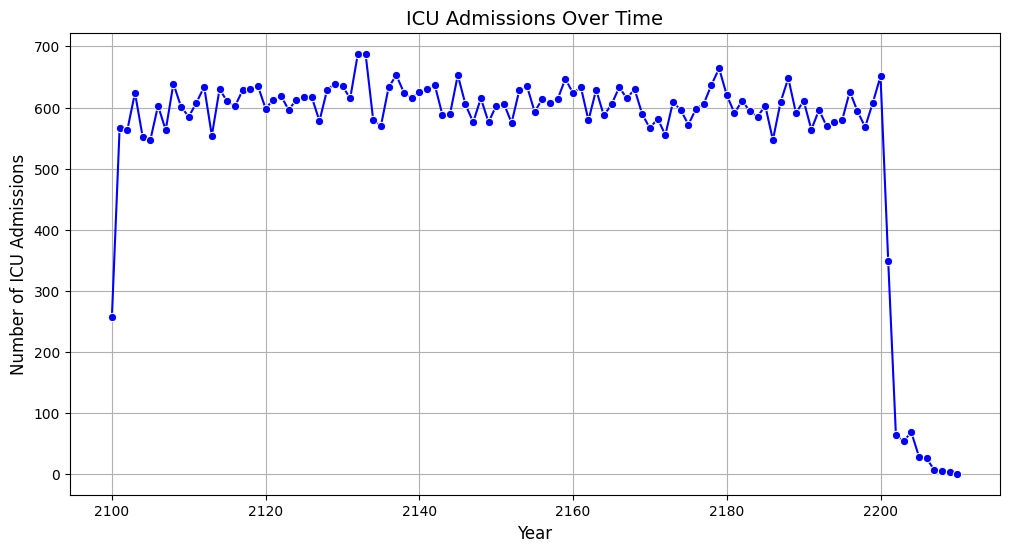

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Merge ICU stays with admissions to get admission times
icu_admissions = pd.merge(icustays, admissions, on="HADM_ID", how="inner")

icu_admissions["Year"] = icu_admissions["ADMITTIME"].dt.year
icu_trend = icu_admissions["Year"].value_counts().sort_index()

# Plot ICU Admissions Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=icu_trend.index, y=icu_trend.values, marker="o", color="b")
plt.title("ICU Admissions Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of ICU Admissions", fontsize=12)
plt.grid(True)
plt.show()


<ipython-input-122-568320866fc0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diagnoses.values, y=top_diagnoses.index, palette="viridis")


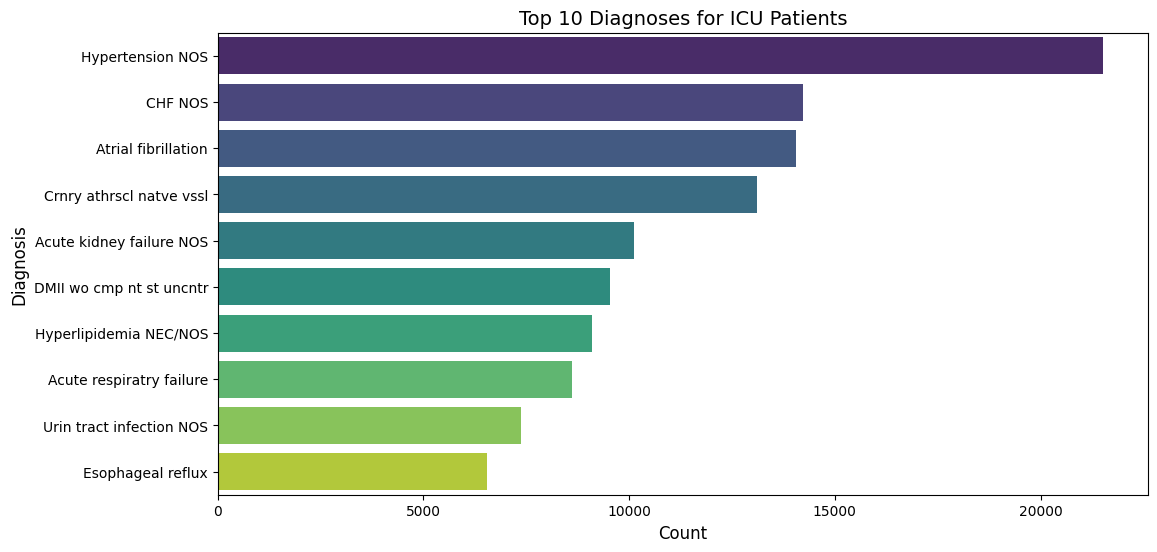

In [122]:
# Merge ICU stays with diagnoses
icu_diagnoses = pd.merge(icustays, diagnoses_icd, on="HADM_ID", how="inner")
icu_diagnoses = pd.merge(icu_diagnoses, d_icd_diagnoses, left_on="ICD9_CODE", right_on="ICD9_CODE", how="inner")

# Count top 10 diagnoses
top_diagnoses = icu_diagnoses["SHORT_TITLE"].value_counts().head(10)

# Plot Top Diagnoses for ICU Patients
plt.figure(figsize=(12, 6))
sns.barplot(x=top_diagnoses.values, y=top_diagnoses.index, palette="viridis")
plt.title("Top 10 Diagnoses for ICU Patients", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Diagnosis", fontsize=12)
plt.show()


In [124]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=e5278feec8007b9e0435aa5773b13d6c630d1ee12d2f958a0fedd945dfe6d025
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


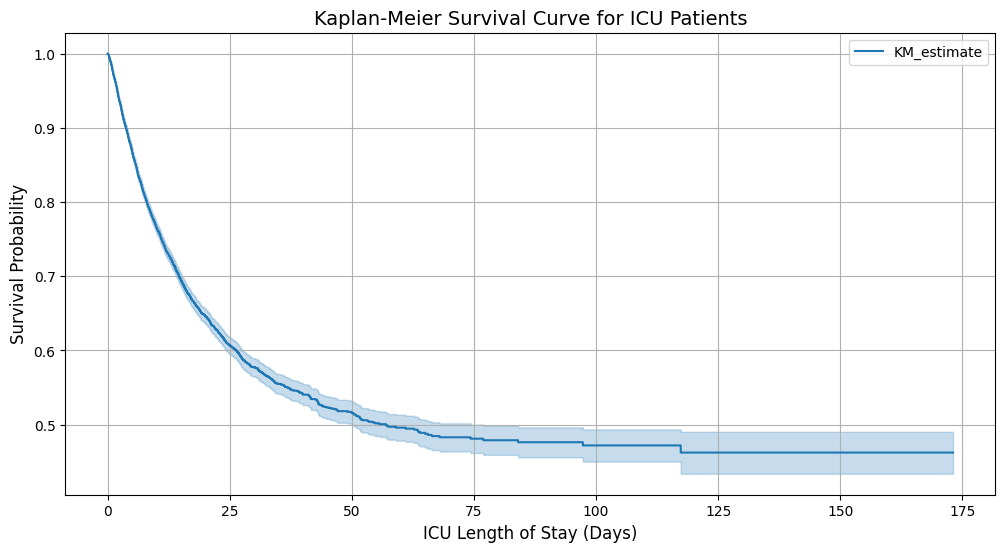

In [126]:
import plotly.express as px
from lifelines import KaplanMeierFitter

icu_mortality_data = pd.merge(icustays, admissions, on="HADM_ID", how="inner")

icu_mortality_data = icu_mortality_data.dropna(subset=["LOS", "HOSPITAL_EXPIRE_FLAG"])
icu_mortality_data["HOSPITAL_EXPIRE_FLAG"] = icu_mortality_data["HOSPITAL_EXPIRE_FLAG"].astype(int)

# Convert ICU stay duration to days
icu_mortality_data["LOS"] = (icu_mortality_data["OUTTIME"] - icu_mortality_data["INTIME"]).dt.total_seconds() / 86400

# Kaplan-Meier Survival Curve
kmf = KaplanMeierFitter()
plt.figure(figsize=(12, 6))

# Fit the survival model for ICU patients
kmf.fit(icu_mortality_data["LOS"], event_observed=icu_mortality_data["HOSPITAL_EXPIRE_FLAG"])
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve for ICU Patients", fontsize=14)
plt.xlabel("ICU Length of Stay (Days)", fontsize=12)
plt.ylabel("Survival Probability", fontsize=12)
plt.grid(True)
plt.show()